- 의료보조 서비스
- 수식화(모델링) 단계
  - 어떤 대상이 이 서비스(모델)을 사용할 것인가?
  - 의사를 대상으로 할 때: ex) 환자의 상태를 파악할 수 있는 자료를 input으로 받아서 
  - 환자를 대상으로 할 때: 

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/헬스케어 머신러닝

/content/drive/MyDrive/헬스케어 머신러닝


In [4]:
df1 = pd.read_csv('preprocessing.csv')
print(df1.shape)

(1894, 52)


In [6]:
df1.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

In [6]:
df1.head()

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0


In [7]:
df1.isnull().sum() # 결측치 존재

Unnamed: 0                   0
환자ID                         0
Large Lymphocyte             0
Location of herniation       0
ODI                       1432
가족력                         51
간질성폐질환                       0
고혈압여부                        0
과거수술횟수                       0
당뇨여부                         0
말초동맥질환여부                     0
빈혈여부                         0
성별                           0
스테로이드치료                      0
신부전여부                        0
신장                           0
심혈관질환                        0
암발병여부                        0
연령                           0
우울증여부                        0
입원기간                         0
입원일자                         0
종양진행여부                       0
직업                         415
체중                           0
퇴원일자                         0
헤모글로빈수치                      1
혈전합병증여부                      0
환자통증정도                       0
흡연여부                         0
통증기간(월)                      4
수술기법                        81
수술시간    

In [8]:
df1.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [9]:
# 변수 선택 (서비스의 대상을 기준으로) / 결측치 제거
df2 = df1[['성별', '신장', '체중', '흡연여부', '연령', '혈액형', '직업', '재발여부']] #의미 있는 항목만 남김
df3 = df2.dropna()
print(df3.shape)

(1479, 8)


- 설명변수 및 목표변수 설정

In [10]:
# 더미변수 처리 (문자 데이터 -> one hot encoding)
X = df3.drop(columns = '재발여부')
X1 = pd.get_dummies(X)
X1

,성별,신장,체중,흡연여부,연령,혈액형_RH+A,혈액형_RH+AB,혈액형_RH+B,혈액형_RH+O,직업_건설업,...,직업_사무직,직업_사업가,직업_예술가,직업_운동선수,직업_운수업,직업_의료직,직업_자영업,직업_주부,직업_특수전문직,직업_학생
0,2,163,60.3,0,66,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,171,71.7,0,47,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,178,77.1,0,39,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,174,74.2,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,183,80.7,0,42,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,2,157,64.0,0,59,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1890,2,157,59.0,0,42,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1891,1,167,70.0,0,61,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1892,1,177,77.0,0,29,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
Y = df3['재발여부']

In [12]:
Y.value_counts()

0    1302
1     177
Name: 재발여부, dtype: int64

In [13]:
# 머신러닝 알고리즘 호출
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler # 재발여부 -> 데이터가 1 or 0로 바뀌었기 때문에, 거기에 스케일을 맞추기 위해서
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree # 시각화

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.3,
                                                    random_state=1234)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1035, 26)
(1035,)
(444, 26)
(444,)


In [15]:
pipe_list = [('scaler', MinMaxScaler()), ('model', DecisionTreeClassifier())]

pipe_model = Pipeline(pipe_list)
pipe_model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', DecisionTreeClassifier())])

In [16]:
hyper_list = {'model__max_depth': range(2,10),
              'model__min_samples_leaf': range(2,10),
              'model__criterion': ['gini', 'entropy'],
              'model__class_weight': [None, 'balanced'],
              'model__min_samples_split': range(2,10)} # 재발여부는 10:1 정도로 꺠져있기에 이 언밸런스한 데이터를 맞춰준다.

grid_model = GridSearchCV(pipe_model, param_grid = hyper_list,
                          scoring = 'f1', n_jobs = -1, cv = 5)
grid_model.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': range(2, 10),
                         'model__min_samples_leaf': range(2, 10),
                         'model__min_samples_split': range(2, 10)},
             scoring='f1')

In [17]:
best_model = grid_model.best_estimator_

In [18]:

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

- 분류모델에서 확인하고자 하는 Target 항목의 데이터의 비율이 적으면 
  - recall값이 매우 떨어지는 현상이 도출됨 (아래와 같이)


In [19]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       911
           1       0.93      0.23      0.36       124

    accuracy                           0.91      1035
   macro avg       0.92      0.61      0.66      1035
weighted avg       0.91      0.91      0.88      1035



In [20]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       391
           1       0.56      0.09      0.16        53

    accuracy                           0.88       444
   macro avg       0.72      0.54      0.55       444
weighted avg       0.85      0.88      0.84       444



In [21]:
## 굉장히 성능이 낮게 나왔지만 실무에서는 이런 경우 많이 발생한다....

In [22]:
# 개선을 할 필요가 있다.

In [23]:
# 일단 트리구조를 한번 만들어보자

- 트리구조 시각화

In [34]:
import matplotlib.pyplot as plt

In [29]:
col_name = X_train.columns # 의미있는 변수명들을 색출

In [40]:
from IPython.core.display import set_matplotlib_formats
set_matplotlib_formats('retina') # plot을 선명하게 그려줌

<ipython-input-40-562d4c7a4188>:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [41]:
best_model['model']

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

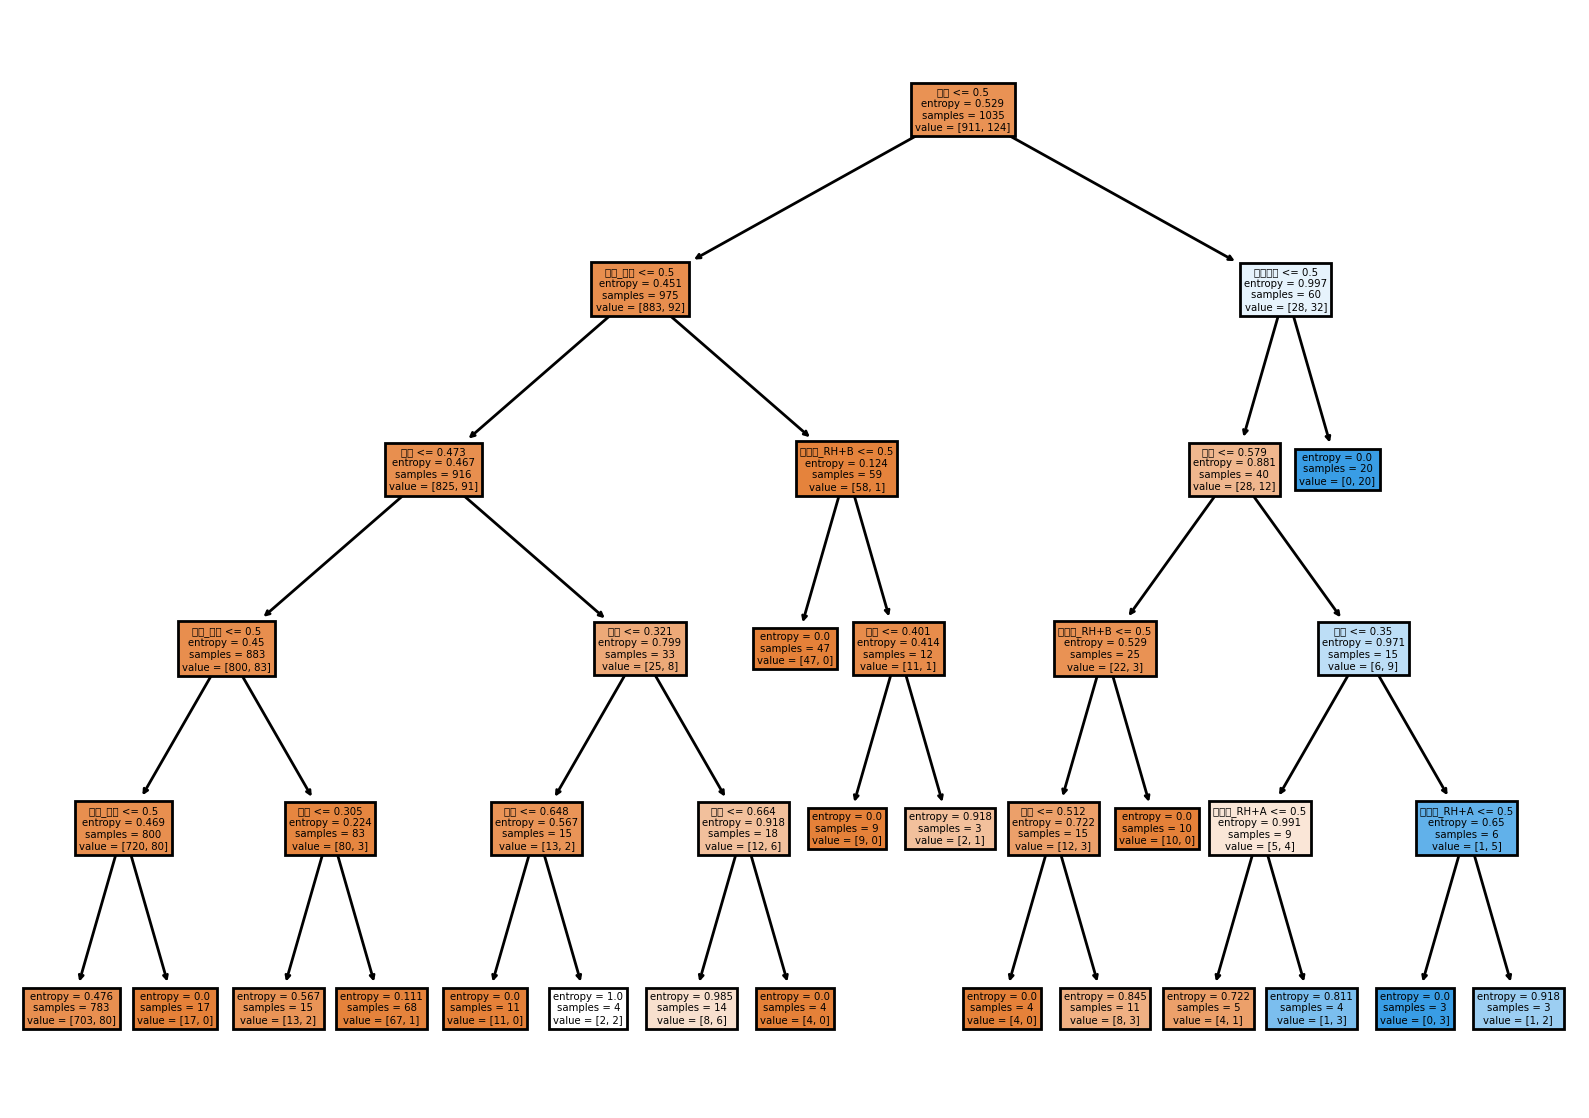

In [43]:
plt.figure(figsize=(10,7)) # best model에서 depth가 깊기에 figsize로 조정
plot_tree(best_model['model'], feature_names=col_name, filled = True) #filled를 통해 재발/비재발 색으로 나눠줌
plt.show() # plot_tree시 글씨 쫘르륵 나오는거 제거해줌

In [44]:
# 첫번째로 체중을 기준으로 재발 여부가 나뉘었다. 
# 그런데 왼쪽도 재발할 사람들이 92명씩이나 있어서 큰 의미가??

- 설명변수 중요도

In [47]:
df_importance = pd.DataFrame()
df_importance['Feature'] = col_name
df_importance['Importance'] = best_model['model'].feature_importances_

In [64]:
# 가장 중요했던 변수 순서로 나열
# Importance값이 높은 상위 5개의 Feature들을 list로 선언
order_list = df_importance.sort_values(by = 'Importance',
                          ascending = False).head(5)["Feature"].tolist()

In [56]:
import seaborn as sns

<Axes: xlabel='Feature', ylabel='Importance'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 55137 (\N{HANGUL SYLLABLE HEUB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*a

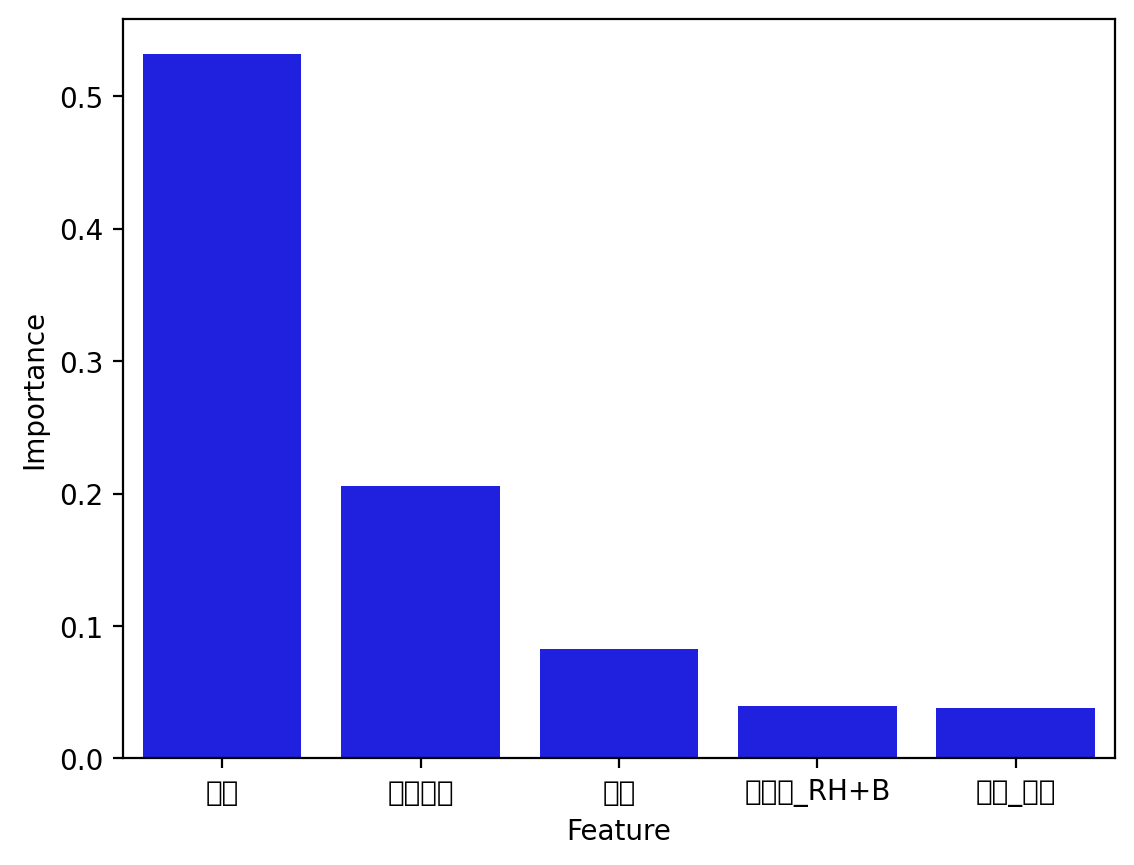

In [66]:
sns.barplot(data = df_importance, x = 'Feature', y = 'Importance', 
            color = 'blue', order = order_list)

In [ ]:
# 이제 개판인 성능을 개선해보자

- 모델 개선 작업
  - sampling (Under Sampling)
  - Threshold

--> 재발/정상의 판단 기준을 낮춰서 모델링 했을 때 결과 얼마나 개선될지 보자

In [67]:
# Under sampling

from imblearn.under_sampling import RandomUnderSampler

In [69]:
Y.value_counts() # 0:정상, 1:제발한 사람

0    1302
1     177
Name: 재발여부, dtype: int64

In [71]:
# 위의 1302명을 177명에 맞게끔 줄여주자. 그럼 괜찮아지지 않을까? (Under Sampling)

In [74]:
sample_model = RandomUnderSampler()
X_under, Y_under = sample_model.fit_resample(X1, Y)

In [75]:
# 재발 한 사람들 기준(Y)로 한번 맞춰보자 --> f1 socre가 0.16나오던게 개선이 될까?

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X_under, Y_under, test_size = 0.3,
                                                    random_state = 1234)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(247, 26)
(247,)
(107, 26)
(107,)


In [ ]:
# under sampling을 해줬기에 데이터 수가 확 줄었다.

In [82]:
grid_model.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': range(2, 10),
                         'model__min_samples_leaf': range(2, 10),
                         'model__min_samples_split': range(2, 10)},
             scoring='f1')

In [83]:
best_model = grid_model.best_estimator_
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

In [84]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       120
           1       0.72      0.82      0.76       127

    accuracy                           0.74       247
   macro avg       0.75      0.74      0.74       247
weighted avg       0.75      0.74      0.74       247



In [85]:
# f1 score가 0.36 -> 0.76으로 대폭 개선되었다!!

In [86]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.60      0.46      0.52        57
           1       0.52      0.66      0.58        50

    accuracy                           0.55       107
   macro avg       0.56      0.56      0.55       107
weighted avg       0.56      0.55      0.55       107



In [87]:
# f1 score가 0.16 -> 0.58으로 대폭 개선되었다!!

In [ ]:
# 트리도 체크해보자

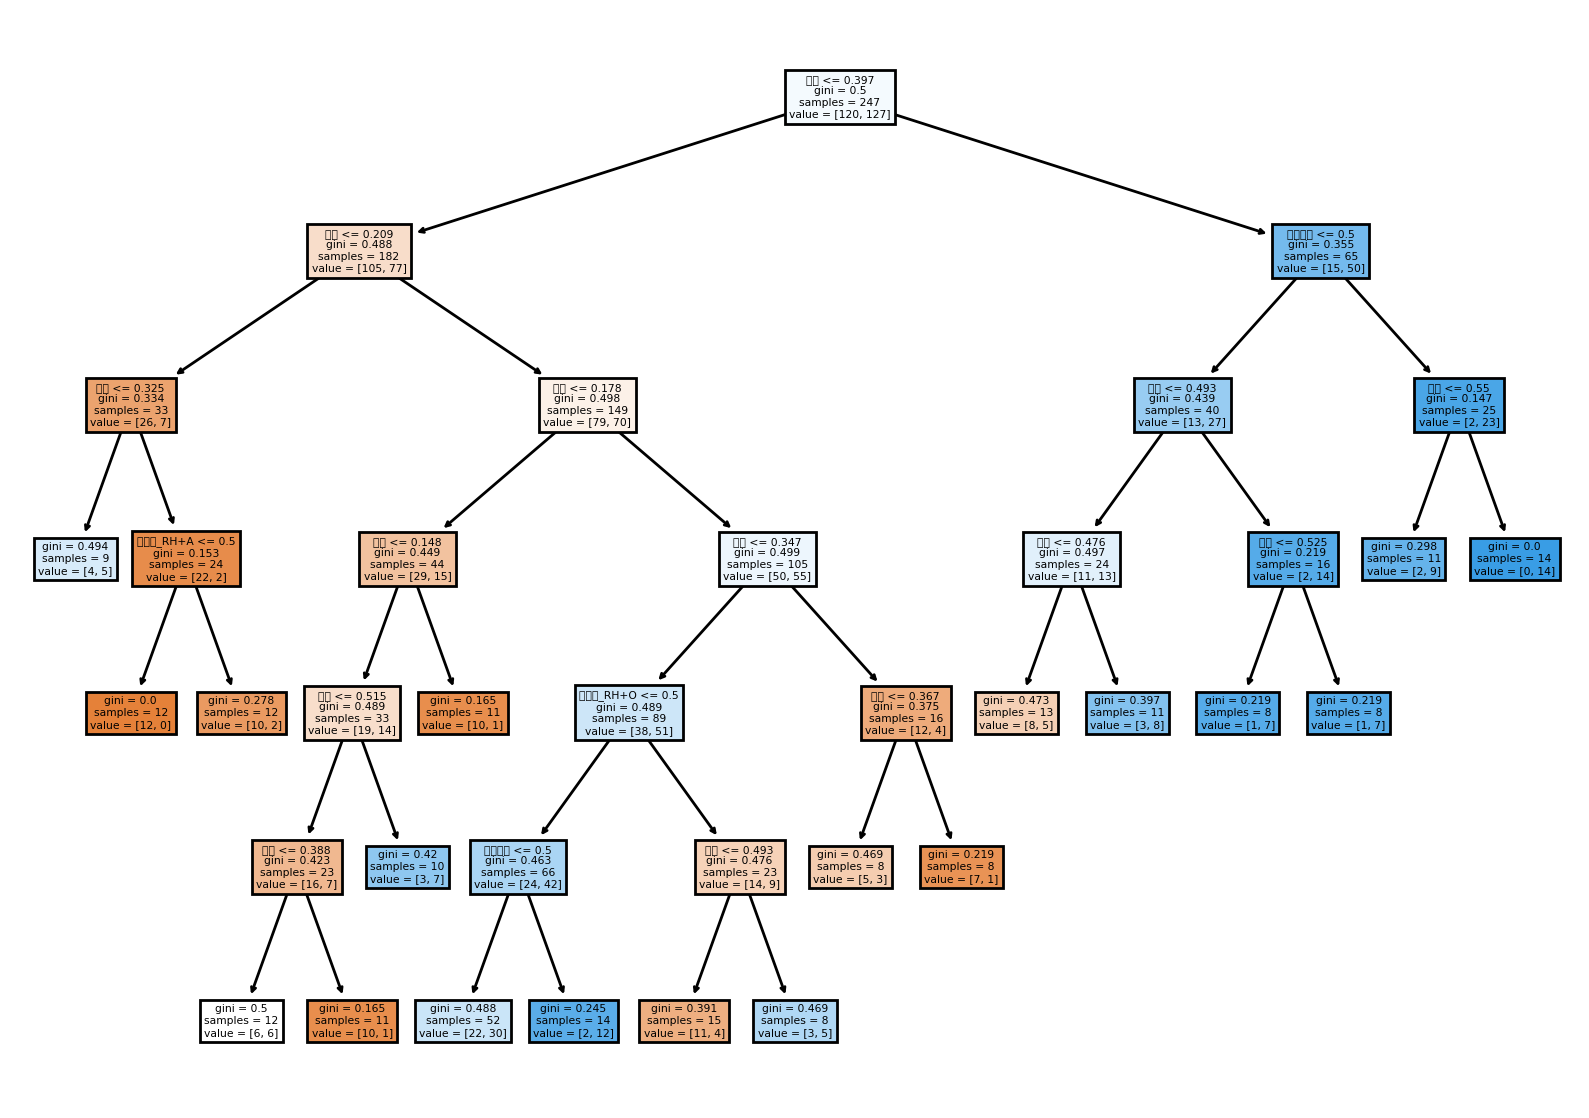

In [89]:
plt.figure(figsize=(10,7)) # best model에서 depth가 깊기에 figsize로 조정
plot_tree(best_model['model'], feature_names=col_name, filled = True) #filled를 통해 재발/비재발 색으로 나눠줌
plt.show() # plot_tree시 글씨 쫘르륵 나오는거 제거해줌

In [ ]:
# 체중과 흡연여부는 under samplig을 해줘도 여전히 중요한 변수

<Axes: xlabel='Feature', ylabel='Importance'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 55137 (\N{HANGUL SYLLABLE HEUB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*a

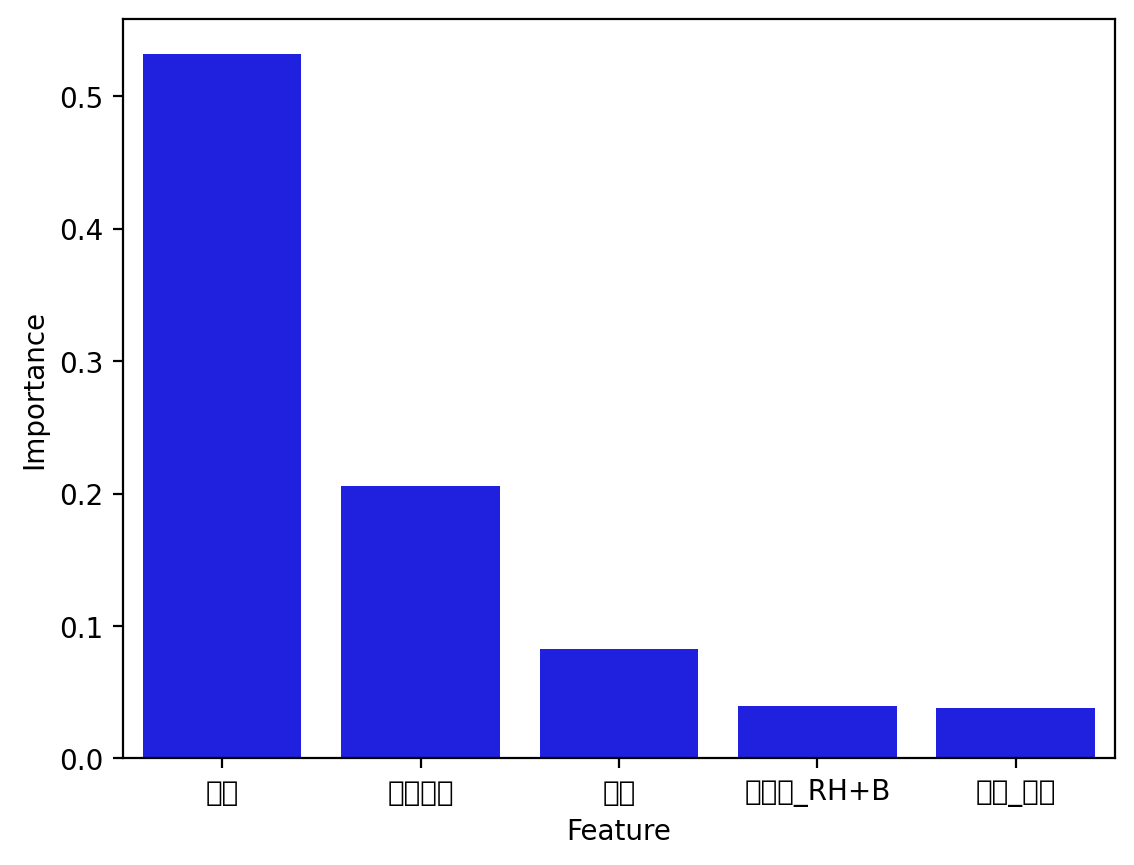

In [91]:
# 가장 중요했던 변수 순서로 나열
# Importance값이 높은 상위 5개의 Feature들을 list로 선언
order_list = df_importance.sort_values(by = 'Importance',
                          ascending = False).head(5)["Feature"].tolist()

sns.barplot(data = df_importance, x = 'Feature', y = 'Importance', 
            color = 'blue', order = order_list)                 

In [93]:
# 그러나 아직 성능이 부족하다!!
# Threshold를 시도해보자

모델개선2
  - Threshold

In [ ]:
# 정상/재발 확률 값
best_model.predict_proba(X_test) # 재발로 분류할 기본 Threshold값은 0.5

In [121]:
# 재발로 분류할 Threshold값을 낮춰보자

from sklearn.preprocessing import Binarizer

In [122]:
import numpy as np

- 일반적으로 50% 기준으로 정상/재발 분류

In [123]:
class_result = np.concatenate([best_model.predict_proba(X_test), # 0 또는 1로 분류할 확률값
               best_model.predict(X_test).reshape(-1,1)], # 실제 분류된 결과
               axis=1) # 세로축(열)기준으로 붙여버리자

pd_result = pd.DataFrame(class_result, columns=['정상확률', '재발확률', '분류값'])
pd_result['분류값'].value_counts()

1.0    64
0.0    43
Name: 분류값, dtype: int64

- 분류 기준을 30%으로 조정하여 정상/재발 분류

In [124]:
pred_proba = best_model.predict_proba(X_test)
pred_proba_target = pred_proba[:, 1].reshape(-1,1) # '재발'로 분류될 확률만 한 줄로 뽑음

# 새로운 임계값 0.3 적용
thres_model = Binarizer(threshold=0.3).fit(pred_proba_target) # Fitting
thres_pred = thres_model.transform(pred_proba_target) # 변환

In [125]:
class_result = np.concatenate([best_model.predict_proba(X_test), # 0 또는 1로 분류할 확률값
               thres_pred.reshape(-1,1)], # 실제 분류된 결과
               axis=1) # 세로축(열)기준으로 붙여버리자

pd_result = pd.DataFrame(class_result, columns=['정상확률', '재발확률', '분류값'])
pd_result['분류값'].value_counts()
# 분류값 -> 정상:0, 재발:1

1.0    82
0.0    25
Name: 분류값, dtype: int64

In [ ]:
 # 정상 43명 -> 25명으로 바뀜

In [126]:
print(classification_report(Y_test, thres_pred))

              precision    recall  f1-score   support

           0       0.64      0.28      0.39        57
           1       0.50      0.82      0.62        50

    accuracy                           0.53       107
   macro avg       0.57      0.55      0.51       107
weighted avg       0.57      0.53      0.50       107



In [ ]:
# 재발률 기준 0.5에서 0.3으로 낮춰주니까
# f1 score 0.58 -> 0.62로 상승!!

지금까지 한거

- 수술 후, 재발 환자와 정상 환자를 분류하는 모델
- Descision Tree Model
- MinMaxScaling / CV = 5 / Hyperparameter Tuning

Pipeline + Scaling(MinMaxScaling) + Modeling(Descision Tree)

-> Gridsearch(CV / Hyper Parameter / Scoring) ---> best model

-> Tree / Feature Importance 확인 ----> 성능이 처참함 (test f1 score가 0.16)

-> 개선

-> Under Sampling --> test f1 score 0.58

-> Threshold --> test f1 score 0.62